In [27]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_rows', 100)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [28]:
house_data = pd.read_csv("../data/Housing_data/housing-classification-iter7.csv")
print(house_data.info())
print(house_data.isna().sum())
house_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

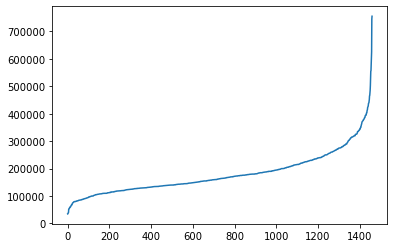

In [30]:
house_data.sort_values('SalePrice').reset_index(drop=True).SalePrice.plot()

In [31]:
house_data['Expensive'] = house_data.apply(lambda x: 1 if x['SalePrice'] > 250000 else 0, axis=1)
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Expensive
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,1
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,0


In [32]:
X = house_data.drop(columns=['Expensive'])
y = house_data['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [33]:
numerical_features = ["OverallQual", "OverallCond", 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
                      'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                      'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                      'MoSold', 'YrSold']

# Unordered categorical columns
nominative_categorical_features = ["MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", 
                                   "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",  "Exterior1st", "Exterior2nd", "MasVnrType", 
                                   "Foundation", "Heating", "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition"]

# Ordered categorical columns
ordinal_categorical_features  = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", 
                                 "FireplaceQu", "GarageQual", "GarageCond", "PoolQC","LotShape", "LandSlope",
                                 "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Functional", "GarageFinish", 
                                 "PavedDrive", "Utilities", "CentralAir", "Electrical", "Fence"] 
ordinal_categories = [
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    ["None", "Reg", "IR1", "IR2", "IR3"],
    ["None", "Sev", "Mod", "Gtl"],
    ["None", "No", "Mn", "Av", "Gd"],
    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    ["None", "Sal", "Sev", "Maj1", "Maj2", "Mod", "Min2", "Min1", "Typ"],
    ["None", "Unf", "RFn", "Fin"],
    ["None", "N", "P", "Y"],
    ["None", "NoSeWa", "NoSewr", "AllPub"],
    ["None", "N", "Y"],
    ["None", "Mix", "FuseP", "FuseF", "FuseA", "SBrkr"],
    ["None", "MnWw", "GdWo", "MnPrv", "GdPrv"]
]

### Pipeline with sklearn.pipeline.Pipeline

In [34]:
# Create the scaling pipelines for categorical and numerical data
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
one_hot_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy="constant", fill_value="None")),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy="constant", fill_value="None")),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories)),
    ('scale', MinMaxScaler())
])

# Apply the scaling pipeline to both categorical and numerical columns
full_processor = ColumnTransformer(transformers=[
    ('numerical', numeric_pipeline, numerical_features), 
    ('one_hot', one_hot_pipeline, nominative_categorical_features), 
    ('ordinal', ordinal_pipeline, ordinal_categorical_features)
])

tree_pipeline = Pipeline(steps=[
    ('processor', full_processor), 
    ('model', DecisionTreeClassifier(max_depth=6))
])

_ = tree_pipeline.fit(X_train, y_train)


# Plot the training data predictions
training_predictions = tree_pipeline.predict(X_train)

### Test the accuracy of the pipeline

In [35]:
training_predictions = tree_pipeline.predict(X_train)
train_accuracy = accuracy_score(training_predictions, y_train)
train_accuracy

0.9871575342465754

In [36]:
predictions = tree_pipeline.predict(X_test)
test_accuracy = accuracy_score(predictions, y_test)
test_accuracy

0.9075342465753424

/home/donal/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


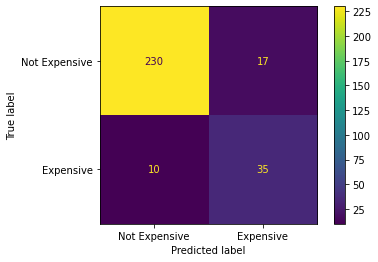

In [37]:
plot_confusion_matrix(tree_pipeline, X_test, y_test, display_labels=['Not Expensive', 'Expensive']);

In [39]:
knn_pipeline = Pipeline(steps=[
    ('processor', full_processor), 
    ('model', KNeighborsClassifier(n_neighbors=6))
])

_ = knn_pipeline.fit(X_train, y_train)


# Plot the training data predictions
training_predictions = knn_pipeline.predict(X_train)
# plot_predictions(y_train, training_predictions)